In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001171825"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001171825
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,CIT GROUP INC
Ticker,CIT


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,38.0,4.831632e+01,5.150980e+00,4.026000e+01,4.419750e+01,4.776000e+01,5.341500e+01,5.705000e+01
interest income,46.0,7.039598e+09,4.445798e+10,1.512900e+06,3.526500e+08,4.736000e+08,5.150750e+08,3.020100e+11
net income,51.0,9.223876e+07,2.583279e+08,-1.154700e+09,7.578300e+06,1.172000e+08,1.817500e+08,6.931000e+08
net interest income,42.0,1.272931e+08,2.049213e+08,-4.380000e+08,2.127500e+07,1.204500e+08,2.688500e+08,6.681000e+08
provision for loan losses,55.0,-2.553565e+07,1.451793e+08,-5.354000e+08,-4.875000e+07,-1.580000e+07,3.080000e+07,4.645000e+08
total revenue,19.0,5.077748e+08,5.498269e+08,-1.187000e+08,1.636000e+08,4.760000e+08,6.517000e+08,2.408100e+09


# Plots

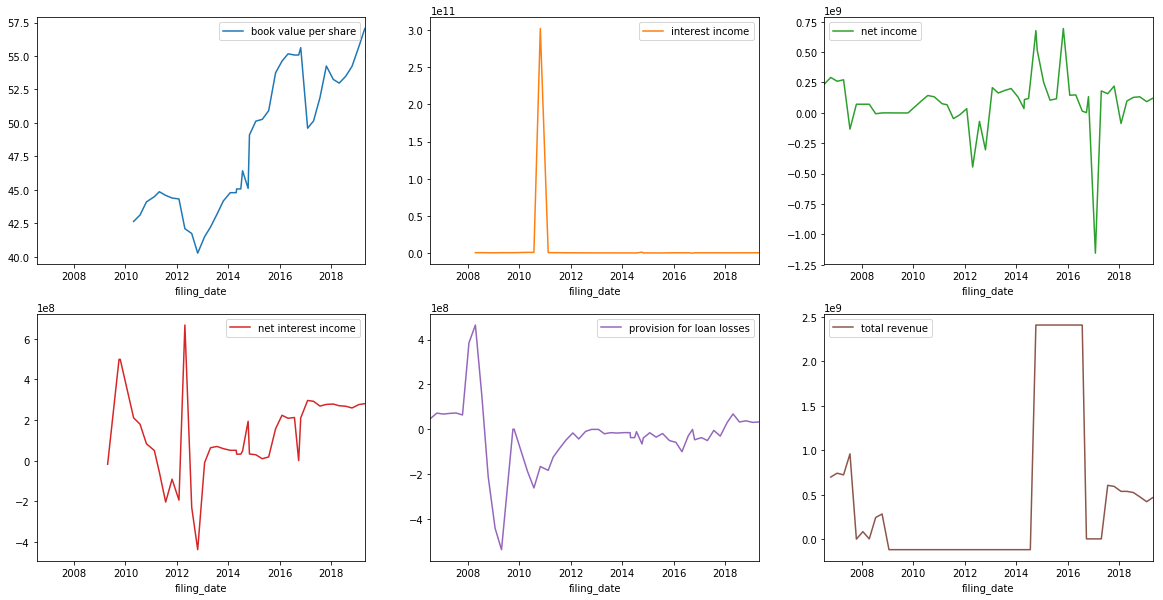

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001171825 book value per share       2006Q2 to 2009Q4: 15 periods    missing   
           interest income             2006Q2 to 2007Q4: 7 periods    missing   
           interest income             2009Q2 to 2009Q4: 3 periods    missing   
           interest income                                  2013Q4  duplicate   
           interest income                                  2015Q4  duplicate   
           net income                  2007Q4 to 2008Q1: 2 periods    missing   
           net income                  2009Q2 to 2009Q4: 3 periods    missing   
           net income                                       2013Q4  duplicate   
           net income                                       2015Q4  duplicate   
           net interest income        2006Q2 to 2008Q3: 10 periods    missing   
           net interest income         2009Q2 to 2009Q4: 3 periods    missing   
           net interest income                              2013Q4  duplicate   
           net interest income                              2015Q4  duplicate   
           provision for loan losses                        2008Q4  duplicate   
           provision for loan losses   2009Q2 to 2009Q4: 3 periods    missing   
           provision for loan losses                        2013Q4  duplicate   
           provision for loan losses                        2015Q4  duplicate   
           total revenue                                    2006Q2    missing   
           total revenue              2009Q1 to 2013Q3: 19 periods    missing   
           total revenue               2014Q1 to 2015Q3: 7 periods    missing   
           total revenue               2016Q1 to 2017Q1: 5 periods    missing   
           total revenue                                    2018Q1    missing   

                                               message  
cik        item                                         
0001171825 book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income            Duplicate period  
           interest income            Duplicate period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           net interest income        Duplicate period  
           provision for loan losses  Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           provision for loan losses  Duplicate period  
           total revenue                Missing period  
           total revenue                Missing period  
           total revenue                Missing period  
           total revenue                Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()